In [102]:
import pandas as pd
from scipy import spatial
from sklearn.metrics.pairwise import cosine_similarity
TEST='kendalltau'
DATA_SOURCE = 'Real'
EXP_BASELINE = False
IMPUTE = False #If False Nan lines are dropped

In [103]:
def get_output_file_name(test, data_source, exp_baseline, impute):    
    print(data_source)
    if data_source=='Real':
        data_source = 'BaselineED'
    else:
        if EXP_BASELINE:
            data_source = 'GenBaselineED'
        else:
            data_source = 'GenED'
    impute = 'imputed' if impute else 'nanDropped'
    return ("_".join([test, data_source, impute]))
print(get_output_file_name(TEST, DATA_SOURCE, EXP_BASELINE, IMPUTE))

Real
kendalltau_BaselineED_nanDropped


In [104]:
## LOAD FEATURE FILES
#bpi_ft = pd.read_csv("../data/34_bpic_features.csv").sort_values('log')
bpi_ft = pd.read_csv("../data/BaselineED_feat.csv").sort_values('log')

#gen_ft =pd.read_csv("../output/generated/instance_selection_feat.csv")
gen_ft = pd.read_csv("../data/GenED_feat.csv")
if EXP_BASELINE:
    gen_ft = pd.read_csv("../data/GenBaselineED_feat.csv")
    gen_ft['log']=gen_ft.apply(lambda x: "Gen"+x['log'], axis=1)

#print(gen_ft['log'].unique())

paper_cols = ["log","ratio_unique_traces_per_trace", "ratio_most_common_variant", 'ratio_top_10_variants', 'epa_normalized_variant_entropy', 'epa_normalized_sequence_entropy', 'epa_normalized_sequence_entropy_linear_forgetting', 'epa_normalized_sequence_entropy_exponential_forgetting'] 
bpi_ft= bpi_ft[paper_cols]
print(gen_ft.shape, bpi_ft.shape)
#print(gen_ft.columns == df.columns)
bpi_ft['source']='Real'
gen_ft['source']='Generated'


#if EXP_BASELINE:
#    gen_ft['log']=gen_ft.apply(lambda x: "Gen"+x['log'], axis=1)
both_df = pd.concat([bpi_ft, gen_ft])
#both_df['log']=both_df.apply(lambda x: x['log'].replace(".xes",""), axis=1)
#both_df['log']=both_df.apply(lambda x: x['log'].replace("_processed",""), axis=1)
print(both_df.shape)
print(both_df['log'].unique())
feature_logs = both_df['log'].unique()
#print(feature_logs)

(467, 8) (26, 8)
(493, 9)
['BPIC12' 'BPIC13cp' 'BPIC13inc' 'BPIC13op' 'BPIC14dc_p' 'BPIC14di_p'
 'BPIC14dia_p' 'BPIC15f1' 'BPIC15f2' 'BPIC15f3' 'BPIC15f4' 'BPIC15f5'
 'BPIC16c_p' 'BPIC16wm_p' 'BPIC17' 'BPIC17ol' 'BPIC19' 'BPIC20a' 'BPIC20b'
 'BPIC20c' 'BPIC20d' 'BPIC20e' 'HD' 'RTFMP' 'RWABOCSL' 'SEPSIS'
 '2_rmcv_rt10v_genELtask_40_03_06' '2_enself_rutpt_genELtask_25_02_02'
 '2_rt10v_rutpt_genELtask_39_03_05' '2_ense_rt10v_genELtask_32_02_09'
 '2_enseef_rt10v_genELtask_41_03_07' '2_enseef_rt10v_genELtask_18_01_06'
 '2_ense_rt10v_genELtask_40_03_06' '2_enve_rt10v_genELtask_45_04_00'
 '2_ense_rt10v_genELtask_21_01_09' '2_enself_rt10v_genELtask_10_00_09'
 '2_enseef_rt10v_genELtask_20_01_08' '2_enself_enve_genELtask_42_03_08'
 '2_enself_rmcv_genELtask_36_03_02' '2_ense_enseef_genELtask_60_05_04'
 '2_enseef_rmcv_genELtask_6_00_05' '2_enself_rutpt_genELtask_5_00_04'
 '2_enve_rt10v_genELtask_69_06_02' '2_enve_rutpt_genELtask_53_04_08'
 '2_enself_rt10v_genELtask_22_01_10' '2_enseef_enve_genELta

In [105]:
## LOAD DISCOVERY METRICS FILES
#bpi_pd = pd.read_csv("../output/benchmark/bpics_PDbenchmark.csv").sort_values('log')
bpi_pd = pd.read_csv("../data/BaselineED_bench.csv").sort_values('log')

#gen_pd = pd.read_csv("../output/benchmark/instance_selection_3_2_bench.csv")
gen_pd = pd.read_csv("../data/GenED_bench.csv")
if EXP_BASELINE:
    gen_pd = pd.read_csv("../data/GenBaselineED_bench.csv")
    gen_pd['log']=gen_pd.apply(lambda x: "Gen"+x['log'].replace("genEL","").rsplit("_",7)[0], axis=1)

#gen_pd = gen_pd.sample(30)

paper_metrics = ['log', 'fitness_heu', 'precision_heu',
       'fscore_heu', 'size_heu', 'cfc_heu', 'fitness_ilp', 'precision_ilp', 'fscore_ilp',
       'size_ilp','cfc_ilp', 'fitness_imf', 'precision_imf', 'fscore_imf', 'size_imf', 'cfc_imf', 'source']

print(gen_pd.shape, bpi_pd.shape)
bpi_pd['source']='Real'
gen_pd['source']='Generated'
#gen_pd['log']=gen_pd.apply(lambda x: "Gen"+x['log'].replace("genEL","").rsplit("_",7)[0], axis=1)
#if EXP_BASELINE:
#    gen_pd['log']=gen_pd.apply(lambda x: "Gen"+x['log'], axis=1)
both_pd = pd.concat([bpi_pd, gen_pd])
both_pd= both_pd[paper_metrics]
#both_pd['log']=both_pd.apply(lambda x: x['log'].replace(".xes",""), axis=1)
#both_pd['log']=both_pd.apply(lambda x: x['log'].replace("_processed",""), axis=1)
print(both_pd.shape)
print(both_pd['log'].unique())

(432, 19) (17, 19)
(449, 17)
['BPIC13cp' 'BPIC13inc' 'BPIC13op' 'BPIC14dc_p' 'BPIC14di_p' 'BPIC16c_p'
 'BPIC16wm_p' 'BPIC17ol' 'BPIC20a' 'BPIC20b' 'BPIC20c' 'BPIC20d' 'BPIC20e'
 'HD' 'RTFMP' 'RWABOCSL' 'SEPSIS' '2_ense_rmcv_genELtask_67_06_00'
 '2_enself_rmcv_genELtask_13_01_01' '2_rt10v_rutpt_genELtask_1_00_00'
 '2_ense_enve_genELtask_2_00_01' '2_rmcv_rutpt_genELtask_35_03_01'
 '2_enseef_rutpt_genELtask_30_02_07' '2_enve_rutpt_genELtask_98_08_09'
 '2_ense_enve_genELtask_27_02_04' '2_rmcv_rutpt_genELtask_40_03_06'
 '2_enve_rmcv_genELtask_57_05_01' '2_ense_rutpt_genELtask_13_01_01'
 '2_enself_rutpt_genELtask_6_00_05' '2_enself_enve_genELtask_1_00_00'
 '2_ense_enve_genELtask_75_06_08' '2_ense_rutpt_genELtask_63_05_07'
 '2_ense_enseef_genELtask_13_01_01' '2_enve_rt10v_genELtask_87_07_09'
 '2_enseef_rmcv_genELtask_26_02_03' '2_enseef_rmcv_genELtask_7_00_06'
 '2_enseef_rutpt_genELtask_66_05_10' '2_ense_enve_genELtask_38_03_04'
 '2_ense_enself_genELtask_46_04_01' '2_ense_rmcv_genELtask_57_05

In [106]:
## MERGE FEATURES AND METRICS
fd_pdm = pd.merge(both_df, both_pd, on=['log', 'source'], how='inner').reset_index(drop=True)#.reindex(both_df.index)

## DROP DUPLICATES
fd_pdm = fd_pdm.reset_index(drop=True)
fd_pdm = fd_pdm.T.drop_duplicates().T
print(fd_pdm.shape)
fd_pdm['log'].unique()

(449, 24)


array(['BPIC13cp', 'BPIC13inc', 'BPIC13op', 'BPIC14dc_p', 'BPIC14di_p',
       'BPIC16c_p', 'BPIC16wm_p', 'BPIC17ol', 'BPIC20a', 'BPIC20b',
       'BPIC20c', 'BPIC20d', 'BPIC20e', 'HD', 'RTFMP', 'RWABOCSL',
       'SEPSIS', '2_rmcv_rt10v_genELtask_40_03_06',
       '2_rt10v_rutpt_genELtask_39_03_05',
       '2_ense_rt10v_genELtask_32_02_09',
       '2_enseef_rt10v_genELtask_41_03_07',
       '2_enseef_rt10v_genELtask_18_01_06',
       '2_ense_rt10v_genELtask_40_03_06',
       '2_enve_rt10v_genELtask_45_04_00',
       '2_ense_rt10v_genELtask_21_01_09',
       '2_enself_rt10v_genELtask_10_00_09',
       '2_enseef_rt10v_genELtask_20_01_08',
       '2_enself_enve_genELtask_42_03_08',
       '2_enself_rmcv_genELtask_36_03_02',
       '2_ense_enseef_genELtask_60_05_04',
       '2_enseef_rmcv_genELtask_6_00_05',
       '2_enself_rutpt_genELtask_5_00_04',
       '2_enve_rutpt_genELtask_53_04_08',
       '2_enself_rt10v_genELtask_22_01_10',
       '2_enseef_enve_genELtask_63_05_07',
       '2_e

In [107]:
### INSTANCE SELECTION: NULLS OR IMPUTATION?
import numpy as np
from sklearn.impute import SimpleImputer

num_cols = fd_pdm.convert_dtypes().select_dtypes(exclude=['string']).columns
str_cols = fd_pdm.convert_dtypes().select_dtypes(include=['string']).columns

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(fd_pdm.drop(str_cols, axis=1))
imp_df = imputer.transform(fd_pdm.drop(str_cols, axis=1))
imp_df = pd.DataFrame(imp_df, columns=num_cols)
imp_df['source'] = fd_pdm['source']
imp_df['log'] = fd_pdm['log']
print("Imputed dataset:" ,imp_df.shape)
print(len(imp_df[imp_df['source']==DATA_SOURCE]['log']))

ft_pdm_no_nans = fd_pdm.copy()
ft_pdm_no_nans = ft_pdm_no_nans.dropna()
ft_pdm_no_nans['source'] = fd_pdm['source']
ft_pdm_no_nans['log'] = fd_pdm['log']
print("No nan's dataset:" ,ft_pdm_no_nans.shape)
print(len(ft_pdm_no_nans[ft_pdm_no_nans['source']==DATA_SOURCE]['log']))

Imputed dataset: (449, 24)
17
No nan's dataset: (295, 24)
14


In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

if IMPUTE:
    benchmarked_ft = imp_df[both_df.columns]
    benchmarked_pd = imp_df[both_pd.columns]
else:
    benchmarked_ft = ft_pdm_no_nans[both_df.columns]
    benchmarked_pd = ft_pdm_no_nans[both_pd.columns]

real_log_names = benchmarked_ft[benchmarked_ft['source']=='Real']['log'].unique()
gen_log_names = benchmarked_ft[benchmarked_ft['source']=='Generated']['log'].unique()

Feature similarity: (13, 282)


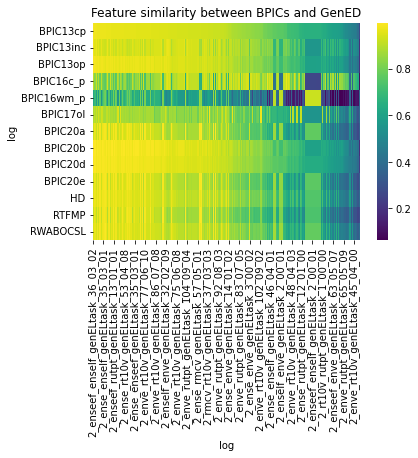

In [109]:
import matplotlib.pyplot as plt
import numpy as np

ft_similarity = cosine_similarity(benchmarked_ft.drop(str_cols, axis=1))
ft_similarity = pd.DataFrame(ft_similarity, columns=benchmarked_ft['log'], index=benchmarked_ft['log'])#.sort_values(by='BPI_Challenge_2013_closed_problems')
ft_similarity = ft_similarity.loc[ft_similarity.columns[len(real_log_names)-1:],ft_similarity.columns[:len(real_log_names)-1]].copy()
ft_similarity = ft_similarity.sort_values(by=ft_similarity.columns[0], ascending=False).transpose()

#with_pcs.loc[:,~with_pcs.columns.duplicated()].copy()
print("Feature similarity:", ft_similarity.shape)
#plt.imshow(ft_similarity, cmap='viridis', interpolation='nearest')
sns.heatmap(ft_similarity.astype(np.float16), cmap="viridis")
ax = plt.gca()
ax.set_title("Feature similarity between BPICs and GenED")
plt.show()

Metrics similarity: (13, 282)


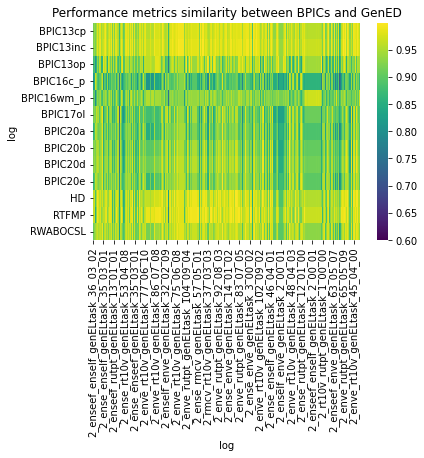

In [110]:
pdm_similarity = cosine_similarity(benchmarked_pd.drop(str_cols, axis=1))
pdm_similarity = pd.DataFrame(pdm_similarity, columns=benchmarked_pd['log'], index=benchmarked_pd['log'])#.sort_values(by='BPI_Challenge_2013_closed_problems')
pdm_similarity = pdm_similarity.loc[pdm_similarity.columns[len(real_log_names)-1:],pdm_similarity.columns[:len(real_log_names)-1]].copy()
pdm_similarity = pdm_similarity.transpose()[ft_similarity.columns]#.sort_values(by=ft_similarity.columns[0], ascending=False)

print("Metrics similarity:", pdm_similarity.shape)
#plt.imshow(pdm_similarity, cmap='viridis', interpolation='nearest')
sns.heatmap(pdm_similarity.astype(np.float16), cmap="viridis", vmin=0.6)
ax = plt.gca()
ax.set_title("Performance metrics similarity between BPICs and GenED")

plt.show()

## Statistical test: Is there a statistical significant relation between feature similarity and performance metrics?

In [111]:
## STATISTICAL TEST ON COSINE SIMILARITIES
from scipy.stats import pearsonr
from scipy.stats import kendalltau

data1 = ft_similarity.to_numpy().flatten()
data2 = pdm_similarity.to_numpy().flatten()

stat, p = eval(f"{TEST}(data1, data2)")
print(f"{TEST}:",'stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably independent')
else:
 print('Probably dependent')

kendalltau: stat=0.061, p=0.000
Probably dependent


(295, 9) (295, 17)
Real (14, 9) (14, 17)
['rutpt', 'rmcv', 'rt10v', 'enve', 'ense', 'enself', 'enseef']
Direct kendalltau Real
Real
../output/plots/pdm_kendalltau_BaselineED_nanDropped


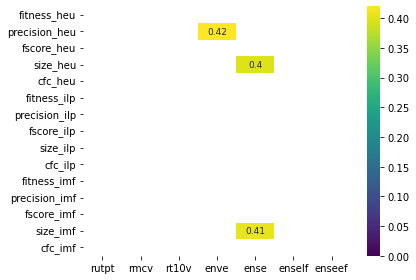

In [112]:
### DIRECT STATISTICAL TEST
from scipy.stats import spearmanr
from scipy.stats import kendalltau
from scipy.stats import pearsonr
from numpy import isnan

import sys
import os
sys.path.append(os.path.dirname("../gedi/utils/io_helpers.py"))
from io_helpers import get_keys_abbreviation

print(benchmarked_ft.shape, benchmarked_pd.shape)

benchmarked_ft_plot = benchmarked_ft.copy()[benchmarked_ft['source']==DATA_SOURCE]
benchmarked_pdm_plot = benchmarked_pd.copy()[benchmarked_pd['source']==DATA_SOURCE]

#benchmarked_ft = benchmarked_ft.head(10)
#benchmarked_pdm = benchmarked_pdm.head(10)
print(DATA_SOURCE, benchmarked_ft_plot.shape, benchmarked_pdm_plot.shape)

tmp = list(benchmarked_ft_plot.columns[1:-1])
df_tmp = pd.DataFrame(index=benchmarked_pdm_plot.columns[1:-1], columns=tmp)
#print("Benchmark_pdm:", benchmarked_pdm.columns[1:-1])
#print ("Benchmark_ft:", tmp)

for feature in benchmarked_ft_plot.columns:
    if feature != 'log' and feature != 'source':
        for metric in benchmarked_pdm_plot.columns:
            if metric != 'log' and metric != 'source':
                #print(feature, benchmarked_pdm.columns[1])
                stat, p = eval(f"{TEST}(benchmarked_ft_plot[feature], benchmarked_pdm_plot[metric])")   
                #print(feature, metric, p, p <= 0.05)
                df_tmp.loc[metric, feature] = stat*(1.0 if (p <= 0.05) else 0.0)

feature_keys = get_keys_abbreviation(df_tmp.columns).split("_")
print(feature_keys)
df_tmp.columns=feature_keys
print("Direct", TEST, DATA_SOURCE)
# df_tmp[pd.isnan()]

sns.heatmap(df_tmp.fillna(0), annot=True, cmap="viridis", annot_kws={"size": 9})
ax = plt.gca()
sns.heatmap(df_tmp.fillna(0), mask=df_tmp.fillna(0)!=0, cmap="Greys", annot=False, cbar=False, ax=ax)
#ax.set_title("P-values of features leading to process discovery metrics", fontsize=15)
plt.tight_layout()
output_path = f"../output/plots/pdm_{get_output_file_name(TEST, DATA_SOURCE, EXP_BASELINE, IMPUTE)}"
print(output_path)
plt.savefig(output_path, dpi=300)

(295, 9) (295, 17)
Real (14, 9) (14, 17)
['rutpt', 'rmcv', 'rt10v', 'enve', 'ense', 'enself', 'enseef']
Similarity kendalltau Real
Real
../output/plots/pdmSim_kendalltau_BaselineED_nanDropped


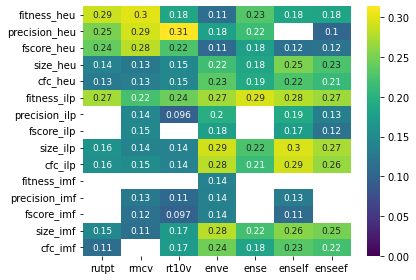

In [113]:
### SIMILARITY STATISTICAL TEST
from scipy.stats import spearmanr
from scipy.stats import kendalltau
from numpy import isnan

print(benchmarked_ft.shape, benchmarked_pd.shape)

benchmarked_ft_plot = benchmarked_ft.copy()[benchmarked_ft['source']==DATA_SOURCE]
benchmarked_pdm_plot = benchmarked_pd.copy()[benchmarked_pd['source']==DATA_SOURCE]

print(DATA_SOURCE, benchmarked_ft_plot.shape, benchmarked_pdm_plot.shape)

tmp = list(benchmarked_ft_plot.columns[1:-1])
df_tmp = pd.DataFrame(index=benchmarked_pdm_plot.columns[1:-1], columns=tmp)
#print("Benchmark_pdm:", benchmarked_pdm.columns[1:-1])
#print ("Benchmark_ft:", tmp)


for feature in benchmarked_ft_plot.columns:
    if feature != 'log' and feature != 'source':
        for metric in benchmarked_pd.columns:
            if metric != 'log' and metric != 'source':
                #print(feature, benchmarked_pdm.columns[1])
                X = benchmarked_ft_plot[feature].to_numpy()
                ft_sim = (1-np.abs(np.subtract.outer(X,X)/max(X))).flatten()
                #ft_sim = np.nan_to_num(ft_sim)
                
                Y = benchmarked_pdm_plot[metric].to_numpy()
                Y = [y if y!=0 else 1.e-100 for y in Y]
                pdm_sim = (1-np.abs(np.subtract.outer(Y,Y))/Y).flatten()
                #pdm_sim = np.nan_to_num(pdm_sim)
                #print(ft_sim, pdm_sim)
                #print(f"{TEST}(ft_sim, pdm_sim)")
                stat, p = eval(f"{TEST}(ft_sim, pdm_sim)")
                #print(feature, metric, p, p <= 0.05)
                df_tmp.loc[metric, feature] = stat*(1.0 if (p <= 0.05) else 0)

# df_tmp[pd.isnan()]

feature_keys = get_keys_abbreviation(df_tmp.columns).split("_")
print(feature_keys)
df_tmp.columns=feature_keys
sns.heatmap(df_tmp.fillna(0), annot=True, cmap="viridis", annot_kws={"size": 9})
ax = plt.gca()
sns.heatmap(df_tmp.fillna(0), mask=df_tmp.fillna(0)!=0, cmap="Greys", annot=True, annot_kws={"color":"white", "size": 9},  cbar=False, ax=ax)
print("Similarity", TEST, DATA_SOURCE)

#ax.set_title("P-values of feature similarity leading to process discovery metrics similarity", fontsize=15)
output_path = f"../output/plots/pdmSim_{get_output_file_name(TEST, DATA_SOURCE, EXP_BASELINE, IMPUTE)}"
print(output_path)
plt.tight_layout()
plt.savefig(output_path, dpi=300)